<img src="../../images/QISKit.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="250 px" align="left">

## _*Basic Quantum Operations*_ 

The latest version of this notebook is available on https://github.com/QISKit/qiskit-tutorial.

***
### Contributors
Jay Gambetta, Rudy Raymond and Ali Javadi

In the first notebook we did not describe the operations just showed you how to make a quantum circuit and run it. Now its time to learn what each of them do. In this notebook we will go into the different operations that are available  in QISKit-core. These are:
* Single-qubit quantum gates
* Multi-qubit quantum gates
* Measurements
* Reset
* Conditionals
* State initialization

In [1]:
import sys
try:
    sys.path.append("../../") # go to parent dir
    import Qconfig
    qx_config = {
        "APItoken": Qconfig.APItoken,
        "url": Qconfig.config['url']}
except:
    qx_config = {
        "APItoken":"YOUR_TOKEN_HERE",
        "url":"https://quantumexperience.ng.bluemix.net/api"}

In [2]:
# Useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import QuantumProgram
from qiskit.backends import discover_local_backends, discover_remote_backends
from qiskit.tools.visualization import circuit_drawer

## Single Qubit Quantum states

A single qubit quantum state can be written as

$$|\psi\rangle = \alpha|0\rangle + \beta |1\rangle$$


where $\alpha$ and $\beta$ are complex numbers. In a measurement the probability of the bit being in $|0\rangle$ is $|\alpha|^2$ and $|1\rangle$ is $|\beta|^2$. As a vector this is

$$
|\psi\rangle =  
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}.
$$

Note due to conservation probability $|\alpha|^2+ |\beta|^2 = 1$ and since global phase is undetectable $|\psi\rangle := e^{i\delta} |\psi\rangle$ we only requires two real numbers to describe a single qubit quantum state.

A convenient representation is

$$|\psi\rangle = \cos(\theta/2)|0\rangle + \sin(\theta/2)e^{i\phi}|1\rangle$$

where $0\leq \phi < 2\pi$, and $0\leq \theta \leq \pi$.  From this it is clear that there is a one-to-one correspondence between qubit states ($\mathbb{C}^2$) and the points on the surface of a unit sphere ($\mathbb{R}^3$). This is called the Bloch sphere representation of a qubit state.

Quantum gates/operations are usually represented as matrices. A gate which acts on a qubit is represented by a $2\times 2$ unitary matrix $U$. The action of the quantum gate is found by multiplying the matrix representing the gate with the vector which represents the quantum state.

$$|\psi'\rangle = U|\psi\rangle$$

A general unitary must be able to take the $|0\rangle$ to the above state. That is 

$$
U = \begin{pmatrix}
\cos(\theta/2) & a \\
e^{i\phi}\sin(\theta/2) & b 
\end{pmatrix}
$$ 

where $a$ and $b$ are complex numbers constrained such that $U^\dagger U = I$ for all $0\leq\theta\leq\pi$ and $0\leq \phi<2\pi$. This gives 3 constraints and as such $a\rightarrow -e^{i\lambda}\sin(\theta/2)$ and $b\rightarrow e^{i\lambda+i\phi}\cos(\theta/2)$ where $0\leq \lambda<2\pi$ giving 

$$
U = \begin{pmatrix}
\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2) 
\end{pmatrix}.
$$

This is the most general form of a single qubit unitary.

## Single-Qubit Gates

The single-qubit gates available are:
* u gates
* Identity gate
* Pauli gates
* Cliffords gates
* $C3$ gates
* Standard rotation gates 

We have provided a backend: `local_unitary_simulator` to allow you to calculate the unitary matrices. 

In [4]:
q = QuantumRegister("q", 1)
c = ClassicalRegister("c", 1)

### u gates

In QISKit we give you access to the general unitary using the $u3$ gate

$$
u3(\theta, \phi, \lambda) = U(\theta, \phi, \lambda) 
$$


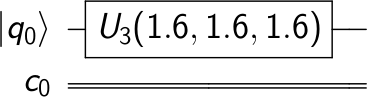

In [5]:
qc = QuantumCircuit(q, c)
qc.u3(pi/2,pi/2,pi/2,q)
circuit_drawer(qc)

In [6]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_unitary_simulator')
np.round(result.get_data('test')['unitary'], 3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   +0.707j, -0.707+0.j   ]])

The $u2(\phi, \lambda) =u3(\pi/2, \phi, \lambda)$ has the martix form

$$
u2(\phi, \lambda) = 
\frac{1}{\sqrt{2}} \begin{pmatrix}
1 & -e^{i\lambda} \\
e^{i\phi} & e^{i(\phi + \lambda)}
\end{pmatrix}.
$$

This is a useful gate as it allows us to create superpositions

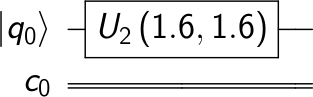

In [7]:
qc = QuantumCircuit(q, c)
qc.u2(pi/2,pi/2,q)
circuit_drawer(qc)

In [8]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_unitary_simulator')
np.round(result.get_data('test')['unitary'], 3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   +0.707j, -0.707+0.j   ]])

The $u1(\lambda)= u3(0, 0, \lambda)$ gate has the matrix form

$$
u1(\lambda) = 
\begin{pmatrix}
1 & 0 \\
0 & e^{i \lambda}
\end{pmatrix},
$$

which is a useful as it allows us to apply a quantum phase.

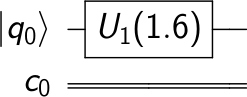

In [9]:
qc = QuantumCircuit(q, c)
qc.u1(pi/2,q)
circuit_drawer(qc)

In [10]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_unitary_simulator')
np.round(result.get_data('test')['unitary'], 3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

The $u0(\delta)= u3(0, 0, 0)$ gate is the identity matrix. It has the matrix form

$$
u0(\delta) = 
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}.
$$

The identity gate does nothing (but can add noise in the real device for a period of time equal to fractions of the single qubit gate time)

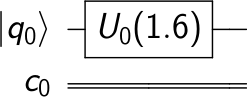

In [11]:
qc = QuantumCircuit(q, c)
qc.u0(pi/2,q)
circuit_drawer(qc)

In [12]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_unitary_simulator')
np.round(result.get_data('test')['unitary'], 3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

### Identity gate

The identity gate is $Id = u0(1)$.

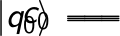

In [13]:
qc = QuantumCircuit(q, c)
qc.iden(q)
circuit_drawer(qc)

In [14]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_unitary_simulator')
np.round(result.get_data('test')['unitary'], 3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

### Pauli gates

#### $X$: bit-flip gate

The bit-flip gate $X$ is defined as:

$$
X   =  
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}= u3(\pi,0,\pi)
$$

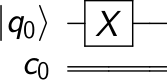

In [15]:
qc = QuantumCircuit(q, c)
qc.x(q)
circuit_drawer(qc)

In [16]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_unitary_simulator')
np.round(result.get_data('test')['unitary'],3)

array([[ 0.+0.j,  1.-0.j],
       [ 1.+0.j, -0.+0.j]])

#### $Y$: bit- and phase-flip gate

The $Y$ gate is defined as:

$$
Y  = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}=u3(\pi,\pi/2,\pi/2)
$$

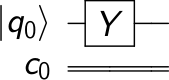

In [17]:
qc = QuantumCircuit(q, c)
qc.y(q)
circuit_drawer(qc)

In [18]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_unitary_simulator')
np.round(result.get_data('test')['unitary'],3)

array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j, -0.+0.j]])

#### $Z$: phase-flip gate

The phase flip gate $Z$ is defined as:

$$
Z = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}=u1(\pi)
$$

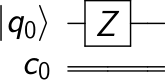

In [19]:
qc = QuantumCircuit(q, c)
qc.z(q)
circuit_drawer(qc)

In [20]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_unitary_simulator')
np.round(result.get_data('test')['unitary'],3)

array([[ 1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j]])

### Clifford gates

#### Hadamard gate

$$
H = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}= u2(0,\pi)
$$

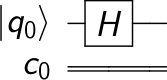

In [21]:
qc = QuantumCircuit(q, c)
qc.h(q)
circuit_drawer(qc)

In [22]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_unitary_simulator')
np.round(result.get_data('test')['unitary'], 3)

array([[ 0.707+0.j,  0.707-0.j],
       [ 0.707+0.j, -0.707+0.j]])

#### $S$ (or, $\sqrt{Z}$ phase) gate

$$
S = 
\begin{pmatrix}
1 & 0\\
0 & i
\end{pmatrix}= u1(\pi/2)
$$

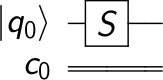

In [23]:
qc = QuantumCircuit(q, c)
qc.s(q)
circuit_drawer(qc)

In [24]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_unitary_simulator')
np.round(result.get_data('test')['unitary'], 3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

#### $S^{\dagger}$ (or, conjugate of $\sqrt{Z}$ phase) gate

$$
S^{\dagger} = 
\begin{pmatrix}
1 & 0\\
0 & -i
\end{pmatrix}= u1(-\pi/2)
$$


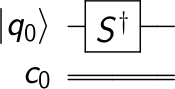

In [25]:
qc = QuantumCircuit(q, c)
qc.sdg(q)
circuit_drawer(qc)

In [26]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_unitary_simulator')
np.round(result.get_data('test')['unitary'], 3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.-1.j]])

### $C3$ gates
#### $T$ (or, $\sqrt{S}$ phase) gate

$$
T = 
\begin{pmatrix}
1 & 0\\
0 & e^{i \pi/4}
\end{pmatrix}= u1(\pi/4) 
$$

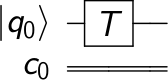

In [27]:
qc = QuantumCircuit(q, c)
qc.t(q)
circuit_drawer(qc)

In [28]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_unitary_simulator')
np.round(result.get_data('test')['unitary'], 3)

array([[1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707+0.707j]])

#### $T^{\dagger}$ (or, conjugate of $\sqrt{S}$ phase) gate

$$
T^{\dagger} =  
\begin{pmatrix}
1 & 0\\
0 & e^{-i \pi/4}
\end{pmatrix}= u1(-pi/4)
$$

They can be added as below.

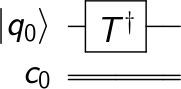

In [29]:
qc = QuantumCircuit(q, c)
qc.tdg(q)
circuit_drawer(qc)

In [30]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_unitary_simulator')
np.round(result.get_data('test')['unitary'], 3)

array([[1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707-0.707j]])

### Standard Rotations

The standard rotation gates are those that define rotations around the Paulis $P=\{X,Y,Z\}$. They are defined as 

$$ R_P(\theta) = \exp(-i \theta P/2) = \cos(\theta/2)I -i \sin(\theta/2)P$$

#### Rotation around X-axis

$$
R_x(\theta) = 
\begin{pmatrix}
\cos(\theta/2) & -i\sin(\theta/2)\\
-i\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix} = u3(\theta, -\pi/2,\pi/2)
$$

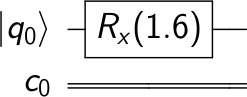

In [31]:
qc = QuantumCircuit(q, c)
qc.rx(pi/2,q)
circuit_drawer(qc)

In [32]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_unitary_simulator')
np.round(result.get_data('test')['unitary'], 3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   -0.707j,  0.707+0.j   ]])

#### Rotation round Y-axis

$$
R_y(\theta) =
\begin{pmatrix}
\cos(\theta/2) & - \sin(\theta/2)\\
\sin(\theta/2) & \cos(\theta/2).
\end{pmatrix} =u3(\theta,0,0)
$$

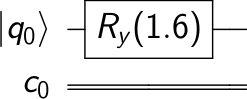

In [33]:
qc = QuantumCircuit(q, c)
qc.ry(pi/2,q)
circuit_drawer(qc)

In [34]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_unitary_simulator')
np.round(result.get_data('test')['unitary'], 3)

array([[ 0.707+0.j, -0.707+0.j],
       [ 0.707+0.j,  0.707+0.j]])

#### Rotation around Z-axis

$$
R_z(\phi) = 
\begin{pmatrix}
e^{-i \phi/2} & 0 \\
0 & e^{i \phi/2}
\end{pmatrix}\equiv u1(\phi)
$$

Note here we have used an equivalent as is different to u1 by global phase $e^{-i \phi/2}$.

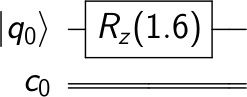

In [35]:
qc = QuantumCircuit(q, c)
qc.rz(pi/2,q)
circuit_drawer(qc)

In [36]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_unitary_simulator')
np.round(np.exp(-1j*pi/4)*result.get_data('test')['unitary'], 3)

array([[0.707-0.707j, 0.   +0.j   ],
       [0.   +0.j   , 0.707+0.707j]])

Note this is different due only to a global phase

## Multi-Qubit Gates

The space of quantum computer grows expodential with the number of qubits. For $n$ qubits the complex vector space has dimensions $d=2^n$. 

Notice that in the QISKit, the order of qubits are represented from the most significant bit (MSB) on the left to the least significant bit (LSB) on the right (big-endian). This is similar to bitstring representation on classical computers, and enables easy conversion from bitstrings to integers after measurements are performed.  That is the first four states of two qubits are $|00\rangle$, $|01\rangle$, $|10\rangle$, and $|11\rangle$.

The joint space is a tensor product space:
\begin{equation}
	X\otimes Y = 
	\begin{pmatrix} 
		x_{00} \begin{pmatrix} 
			y_{00} & y_{01} \\
			y_{10} & y_{11}
		\end{pmatrix} & x_{01} 	\begin{pmatrix} 
				y_{00} & y_{01} \\
				y_{10} & y_{11}
			\end{pmatrix} \\
		x_{10} 	\begin{pmatrix} 
					y_{00} & y_{01} \\
					y_{10} & y_{11}
				\end{pmatrix} & x_{11} 	\begin{pmatrix} 
							y_{00} & y_{01} \\
							y_{10} & y_{11}
						\end{pmatrix}
	\end{pmatrix}						
\end{equation} which means for the states we have 
\begin{equation}\begin{split}
	|{00}\rangle &= \begin{pmatrix} 
		\begin{pmatrix} 
			1  \\
			0
		\end{pmatrix} \\
		\begin{pmatrix} 
			0  \\
			0 
		\end{pmatrix}
	\end{pmatrix} ~  	|{01}\rangle = \begin{pmatrix} 
	\begin{pmatrix} 
	0 \\
	1
	\end{pmatrix} \\
	\begin{pmatrix} 
	0  \\
	0 
	\end{pmatrix}
	\end{pmatrix} ~ 	|{10}\rangle = \begin{pmatrix} 
	\begin{pmatrix} 
	0  \\
	0
	\end{pmatrix} \\
	\begin{pmatrix} 
	1 \\
	0 
	\end{pmatrix}
	\end{pmatrix} ~ 	|{11}\rangle = \begin{pmatrix} 
	\begin{pmatrix} 
	0  \\
	0
	\end{pmatrix} \\
	\begin{pmatrix} 
	0  \\
	1 
	\end{pmatrix}
	\end{pmatrix}\end{split}
\end{equation}

Thus, we write the tensor product of qubits $q_0$, $q_1$, and $q_2$ as $q_2 \otimes q_1 \otimes q_0$. The physics community often writes this in the opposite way, and care must be taken when working with these scenarios, as demonstrated in multi-qubit gates below.

A common two-qubit gate is $C_U$. The $C_U$ when qubit 0 is the control and qubit 1 is the target (eg `cU(q[0],q[1])`) is

\begin{equation}
	C_U = \begin{pmatrix}
	1 & 0 & 0 & 0 \\
	0 & u_{00} & 0 & u_{01} \\
	0 & 0 & 1 & 0 \\
	0 & u_{10} &0 & u_{11}
		\end{pmatrix},
\end{equation} 


The $C_U$ when qubit 1 is the control and qubit 0 is the taget (eg `cU(q[1],q[0])`)
\begin{equation}
	C_U = \begin{pmatrix}
	1 & 0 & 0  & 0 \\
	0 & 1 & 0 & 0 \\
	0 & 0 & u_{00} & u_{01} \\
	0 & 0 & u_{10} & u_{11}
		\end{pmatrix}
\end{equation}

The standard multi-qubit gates consist of two-qubit gates and three-qubit gates. The two-qubit gates are:
* controlled Pauli gates
* controlled Hadamard gate
* controlled rotation gates
* controlled phase gate
* controlled u3 gate
* swap gate

The three-qubit gates are: 
* Toffoli gate 
* Fredkin gate


In [37]:
q = QuantumRegister("q", 2)
c = ClassicalRegister("c", 1)

### Controlled Pauli Gates

#### Controlled-X (or, controlled-NOT) gate
The controlled-not gate flips the `target` qubit when the control qubit is in the state $|1\rangle$. If we take the MSB as the control qubit (e.g. `cx(q[1],q[0])`), then the matrix would look like

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}. 
$$

However, when the LSB is the control qubit, (e.g. `cx(q[0],q[1])`), this gate is equivalent to the following matrix:

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0
\end{pmatrix}. 
$$



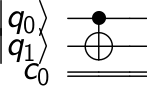

In [38]:
qc = QuantumCircuit(q, c)
qc.cx(q[0],q[1])
circuit_drawer(qc)

In [39]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_unitary_simulator')
np.round(result.get_data('test')['unitary'], 3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]])

#### Controlled $Y$ gate

Apply the $Y$ gate to the target qubit if the control qubit is the MSB

$$
C_Y = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & -i\\
0 & 0 & i & 0
\end{pmatrix},
$$

or when the LSB is the control

$$
C_Y = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & -i\\
0 & 0 & 1 & 0\\
0 & i & 0 & 0
\end{pmatrix}.
$$

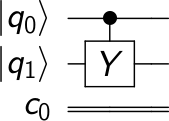

In [40]:
qc = QuantumCircuit(q, c)
qc.cy(q[0],q[1])
circuit_drawer(qc)

In [41]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_unitary_simulator')
np.round(result.get_data('test')['unitary'], 3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j]])

#### Controlled $Z$ (or, controlled Phase) gate

Similarly, the controlled Z gate flips the phase of the target qubit if the control qubit is $1$. The matrix looks the same regardless of whether the MSB or LSB is the control qubit:

$$
C_Z = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1
\end{pmatrix}
$$


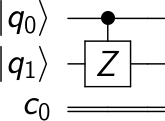

In [42]:
qc = QuantumCircuit(q, c)
qc.cz(q[0],q[1])
circuit_drawer(qc)

In [43]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_unitary_simulator')
np.round(result.get_data('test')['unitary'], 3)

array([[ 1.-0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.-0.j,  0.+0.j, -0.-0.j],
       [ 0.+0.j,  0.+0.j,  1.-0.j,  0.+0.j],
       [ 0.+0.j, -0.+0.j,  0.+0.j, -1.+0.j]])

### Controlled Hadamard gate

Apply $H$ gate to the target qubit if the control qubit is $|1\rangle$. Below is the case where the control is the LSB qubit.

$$
C_H = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}}\\
0 & 0 & 1 & 0\\
0 & \frac{1}{\sqrt{2}}  & 0& -\frac{1}{\sqrt{2}}
\end{pmatrix}
$$

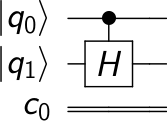

In [44]:
qc = QuantumCircuit(q, c)
qc.ch(q[0],q[1])
circuit_drawer(qc)

In [45]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_unitary_simulator')
np.round(np.exp(-1j*pi/4)*result.get_data('test')['unitary'], 3)

array([[ 1.   -0.j,  0.   +0.j, -0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.707-0.j,  0.   +0.j,  0.707-0.j],
       [ 0.   -0.j,  0.   +0.j,  1.   -0.j,  0.   +0.j],
       [ 0.   +0.j,  0.707-0.j,  0.   +0.j, -0.707+0.j]])

### Controlled rotation gates

#### Controlled rotation around Z-axis

Perform rotation around Z-axis on the target qubit if the control qubit (here LSB) is $|1\rangle$.

$$
C_{Rz}(\lambda) = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & e^{-i\lambda/2} & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\lambda/2}
\end{pmatrix}
$$

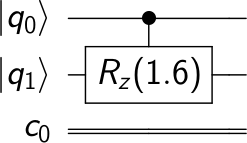

In [46]:
qc = QuantumCircuit(q, c)
qc.crz(pi/2,q[0],q[1])
circuit_drawer(qc)

In [47]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_unitary_simulator')
np.round(result.get_data('test')['unitary'], 3)

array([[1.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707-0.707j, 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.707+0.707j]])

### Controlled phase rotation

Perform a phase rotation if both qubits are in the $|11\rangle$ state. The matrix looks the same regardless of whether the MSB or LSB is the control qubit.

$$
C_{u1}(\lambda) = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\lambda}
\end{pmatrix}
$$

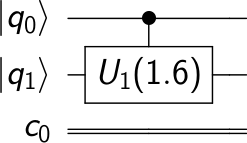

In [48]:
qc = QuantumCircuit(q, c)
qc.cu1(pi/2,q[0], q[1])
circuit_drawer(qc)

I THINK SHOULD BE CALLED $C_\mathrm{PHASE}(\lambda)$

In [49]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_unitary_simulator')
np.round(result.get_data('test')['unitary'], 3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j]])

### Controlled $u3$ rotation

Perform controlled-$u3$ rotation on the target qubit if the control qubit (here LSB) is $|1\rangle$. 

$$
C_{u3}(\theta, \phi, \lambda) \equiv 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & e^{-i(\phi+\lambda)/2}\cos(\theta/2) & 0 & -e^{-i(\phi-\lambda)/2}\sin(\theta/2)\\
0 & 0 & 1 & 0\\
0 & e^{i(\phi-\lambda)/2}\sin(\theta/2) & 0 & e^{i(\phi+\lambda)/2}\cos(\theta/2)
\end{pmatrix}.
$$

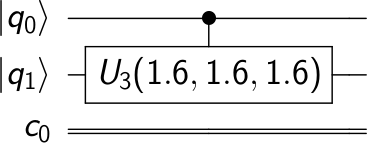

In [50]:
qc = QuantumCircuit(q, c)
qc.cu3(pi/2, pi/2, pi/2, q[0], q[1])
circuit_drawer(qc)

In [51]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_unitary_simulator')
np.round(result.get_data('test')['unitary'], 3)

array([[ 1.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   ,  0.   -0.707j,  0.   +0.j   , -0.707+0.j   ],
       [ 0.   +0.j   ,  0.   +0.j   ,  1.   +0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   ,  0.707+0.j   ,  0.   +0.j   ,  0.   +0.707j]])

NOTE I NEED TO FIX THIS AND DECIDE ON CONVENTION - I ACTUALLY THINK WE WANT A FOUR PARAMETER GATE AND JUST CALL IT CU AND TO REMOVE THIS GATE.

### Swap gate

The swap gate exchange the first and second qubits. 

$$
{SWAP} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1
\end{pmatrix}.
$$

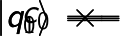

In [52]:
qc = QuantumCircuit(q, c)
qc.swap(q[0], q[1])
circuit_drawer(qc)

In [53]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_unitary_simulator')
np.round(result.get_data('test')['unitary'], 3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

### Toffoli gate ($ccx$ gate)

The Toffoli gate flips the third qubit if the first two qubits (LSB) are both $|1\rangle$.

$$
C_{CX} = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0
\end{pmatrix}
$$

In [54]:
q = QuantumRegister("q", 3)
c = ClassicalRegister("c", 1)

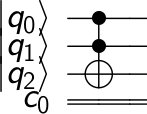

In [55]:
qc = QuantumCircuit(q, c)
qc.ccx(q[0], q[1], q[2])
circuit_drawer(qc)

In [56]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_unitary_simulator')
np.round(result.get_data('test')['unitary'], 3)

array([[ 1.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         1.-0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.-0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.-0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.-0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        -0.+0.j]])

### Controlled swap gate (Fredkin Gate)

The controlled swap gate exchange the second and third qubits if the first qubit (LSB) is $|1\rangle$.

$$
C_{SWAP} = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix}
$$

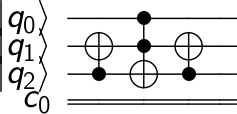

In [57]:
qc = QuantumCircuit(q, c)
qc.cswap(q[0], q[1], q[2])
circuit_drawer(qc)

In [58]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_unitary_simulator')
np.real(np.round(result.get_data('test')['unitary'], 1))

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0., -0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

## Non unitary operations

Now we have gone through all the unitary operations in quantum circuits we also have access to non-unitary operations. These include measurements, reset of qubits, and classical conditional operations.

In [59]:
q = QuantumRegister("q", 1)
c = ClassicalRegister("c", 1)

### Measurements

We dont have access to all the information when we make a measurement in a quantum computer. The quantum state is projected onto the standard basis. Below are two examples showing a circuit that is prepared in a basis state and the quantum computer prepared in a superpostion state.

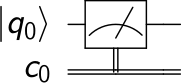

In [60]:
qc = QuantumCircuit(q, c)
qc.measure(q, c)
circuit_drawer(qc)

In [61]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_qasm_simulator', shots=1000)
result.get_counts('test')

{'0': 1000}

 The simulator predicts that 100 percent of the time the classical registor returns 0. 

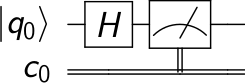

In [62]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q, c)
circuit_drawer(qc)

In [63]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_qasm_simulator', shots=1000)
result.get_counts('test')

{'0': 474, '1': 526}

 The simulator predicts that 50 percent of the time the classical registor returns 0 or 1. 

### Reset
It is also possible to `reset` qubits to the $|0\rangle$ state in the middle of computation. Note that `reset` is not a Gate operation, since it is irreversible.

In [64]:
qc = QuantumCircuit(q, c)
qc.reset(q[0])
qc.measure(q, c)
# circuit_drawer(qc)

In [65]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_qasm_simulator', shots=1000)
result.get_counts('test')

{'0': 1000}

In [66]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.reset(q[0])
qc.measure(q, c)
#circuit_drawer(qc)

In [67]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_qasm_simulator', shots=1000)
result.get_counts('test')

{'0': 1000}

Here we see that for both of these circuits the simulator always predicts that the output is 100 percent in the 0 state.

### Conditional operations
It is also possible to do operations conditioned on the state of the classical registor

In [68]:
qc = QuantumCircuit(q, c)
qc.x(q[0]).c_if(c, 0)
qc.measure(q,c)
# circuit_drawer(qc)

In [69]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_qasm_simulator', shots=1000)
result.get_counts('test')

{'1': 1000}

Here the classical bit always takes the value 0 so the qubit state is always flipped. 

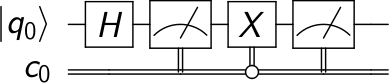

In [70]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q,c)
qc.x(q[0]).c_if(c, 0)
qc.measure(q,c)
circuit_drawer(qc)

In [71]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_qasm_simulator', shots=1000)
result.get_counts('test')

{'1': 1000}

Here the classical bit by the first measurement is random but the conditional operation results in the qubit being deterministically put into $|1\rangle$.

### Arbitrary initialization
What if we want to initialize a qubit register to an arbitrary state? An arbitrary state for $n$ qubits may be specified by a vector of $2^n$ amplitudes, where the sum of amplitude-norms-squared equals 1. For example, the following three-qubit state can be prepared:

$$|\psi\rangle = \frac{i}{4}|000\rangle + \frac{1}{\sqrt{8}}|001\rangle + \frac{1+i}{4}|010\rangle + \frac{1+2i}{\sqrt{8}}|101\rangle + \frac{1}{4}|110\rangle$$

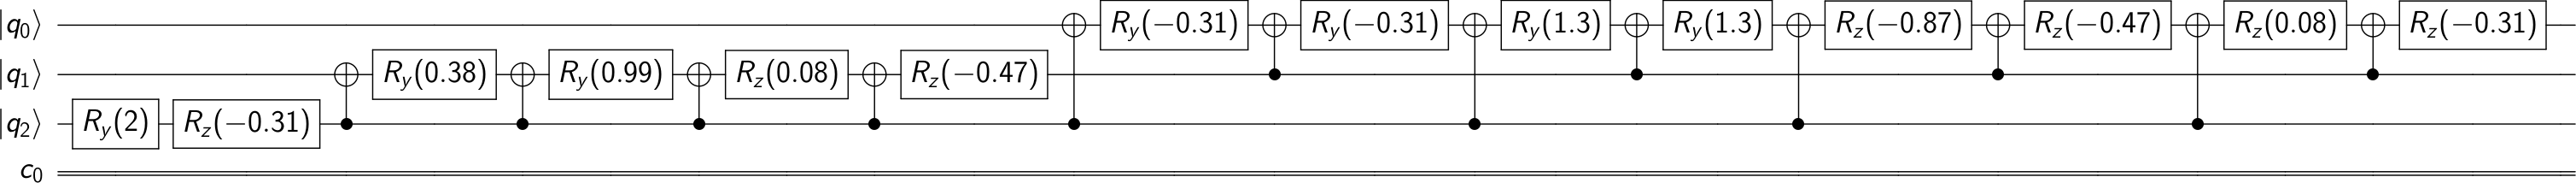

In [72]:
# Initializing a three-qubit quantum state
import math
desired_vector = [
    1 / math.sqrt(16) * complex(0, 1),
    1 / math.sqrt(8) * complex(1, 0),
    1 / math.sqrt(16) * complex(1, 1),
    0,
    0,
    1 / math.sqrt(8) * complex(1, 2),
    1 / math.sqrt(16) * complex(1, 0),
    0]


q = QuantumRegister("q", 3)
c = ClassicalRegister("c", 1)

qc = QuantumCircuit(q, c)

qc.initialize(desired_vector, [q[0],q[1],q[2]])
circuit_drawer(qc)

In [73]:
qp = QuantumProgram()
qp.add_circuit("test", qc)
result = qp.execute(['test'], backend='local_unitary_simulator')
ground = np.zeros(2**3)
ground[0]=1.0
qc_state = np.dot(result.get_data('test')['unitary'], ground)
qc_state

array([ 2.50000000e-01+0.00000000e+00j,  5.55111512e-17-3.53553391e-01j,
        2.50000000e-01-2.50000000e-01j, -2.19980517e-18-3.09536077e-17j,
       -2.62603921e-17+5.08377096e-17j,  7.07106781e-01-3.53553391e-01j,
        8.67361738e-17-2.50000000e-01j,  0.00000000e+00+0.00000000e+00j])

In [74]:
def norm(state1, state2):
    return abs(np.dot(np.array(state1).conj(), state2))**2

In [75]:
norm(desired_vector,qc_state)

1.0

#### Further details:

How does the desired state get generated behind the scenes? There are multiple methods for doing this. QISKit uses a [method proposed by Shende et al](https://arxiv.org/abs/quant-ph/0406176). Here, the idea is to assume the quantum register to have started from our desired state, and construct a circuit that takes it to the $|00..0\rangle$ state. The initialization circuit is then the reverse of such circuit.

To take an arbitrary quantum state to the zero state in the computational basis, we perform an iterative procedure that disentangles qubits from the register one-by-one. We know that any arbitrary single-qubit state $|\rho\rangle$ can be taken to the $|0\rangle$ state using a $\phi$-degree rotation about the Z axis followed by a $\theta$-degree rotation about the Y axis:

$$R_y(-\theta)R_z(-\phi)|\rho\rangle = re^{it}|0\rangle$$

Since now we are dealing with $n$ qubits instead of just 1, we must factorize the state vector to separate the Least Significant Bit (LSB):

$$\begin{align*}
& |\psi\rangle = \alpha_{0_0}|00..00\rangle + \alpha_{0_1}|00..01\rangle + \alpha_{1_0}|00..10\rangle + \alpha_{1_1}|00..11\rangle + ... + \alpha_{(2^{n-1}-1)_0}|11..10\rangle + \alpha_{(2^{n-1}-1)_1}|11..11\rangle \\
&= |00..0\rangle (\alpha_{0_0}|0\rangle + \alpha_{0_1}|1\rangle) + |00..1\rangle (\alpha_{1_0}|0\rangle + \alpha_{1_1}|1\rangle) + ... + |11..1\rangle (\alpha_{(2^{n-1}-1)_0}(|0\rangle + \alpha_{(2^{n-1}-1)_1}|1\rangle) \\
&= |00..0\rangle|\rho_0\rangle + |00..1\rangle|\rho_1\rangle + ... + |11..1\rangle|\rho_{2^{n-1}-1}\rangle
\end{align*}$$

Now each of the single-qubit states $|\rho_0\rangle, ..., |\rho_{2^{n-1}-1}\rangle$ can be taken to $|0\rangle$ by finding appropriate $\phi$ and $\theta$ angles per the equation above. Doing this simultaneously on all states amounts to the following unitary, which disentangles the LSB:

$$U = \begin{pmatrix} 
R_{y}(-\theta_0)R_{z}(-\phi_0) & & & &\\  
& R_{y}(-\theta_1)R_{z}(-\phi_1) & & &\\
& . & & &\\
& & . & &\\
& & & & R_y(-\theta_{2^{n-1}-1})R_z(-\phi_{2^{n-1}-1})
\end{pmatrix} $$

Hence,

$$U|\psi\rangle = \begin{pmatrix} r_0e^{it_0}\\ r_1e^{it_1}\\ . \\ . \\ r_{2^{n-1}-1}e^{it_{2^{n-1}-1}} \end{pmatrix}\otimes|0\rangle$$


U can be implemented as a "quantum multiplexor" gate, since it is a block diagonal matrix. In the quantum multiplexor formalism, a block diagonal matrix of size $2^n \times 2^n$, and consisting of $2^s$ blocks, is equivalent to a multiplexor with $s$ select qubits and $n-s$ data qubits. Depending on the state of the select qubits, the corresponding blocks are applied to the data qubits. A multiplexor of this kind can be implemented after recursive decomposition to primitive gates of cx, rz and ry.

In [76]:
%run "../../version.ipynb"

Package,Version
QISKit,0.4.10
IBMQuantumExperience,>= 1.8.26
numpy,">= 1.13, < 1.14"
scipy,">= 0.19, < 0.20"
matplotlib,">= 2.0, < 2.1"
